## algorithm design and anlysis-2025 spring  homework 3
**Deadline**：2025.5.14

**name**:


note：
---
1. 带有\*的题目，申请免上课的同学，必须完成，其他同学选作；
2. 请独立完成，如求助了他人或者大模型，请著明，并且不可省略算法分析部分；
4. 如若作答有雷同，全部取消成绩；
3. 需要书面作答的题目，可以通过引用图片的形式添加，但是注意上传项目时包含所引用的图片的源文件；
4. $log_n$ 默认表示$log_2{n}$;

## 问题 1  

请证明基于比较的排序算法计算复杂度下界为$\Omega(nlogn)$

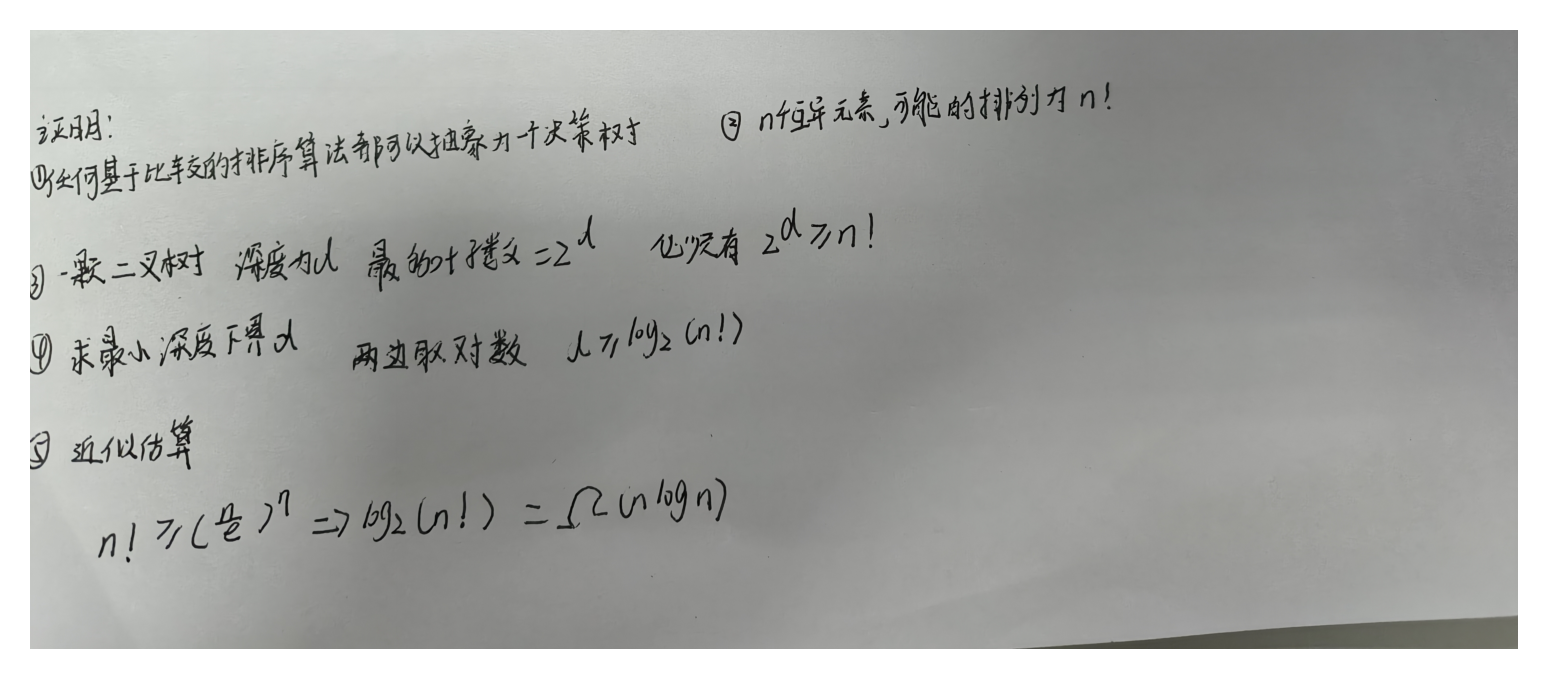

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


img = mpimg.imread("./fig/hw3_1.jpg")


plt.figure(dpi=300)  
plt.imshow(img)
plt.axis("off")  
plt.show()

you can refer a handwritten picture, pleas upload the picture in /fig/xxx.png
answer：

## 问题 2 

构建二叉搜索树

> 1. 给定一个数组 [48, 33, 49, 47, 42, 46, 32], 构建一个二叉搜索树存储这些数据，请**绘制**所构建的**二叉搜索树**（标明结点的值）。
> 2. 从第1问的二叉搜索树中删除33，请**绘制**删除33后的**二叉搜索树**（标明结点的值）

- 推荐使用graphviz包绘制树的结构

you can refer a handwritten picture, pleas upload the picture in /fig/xxx.png
answer：

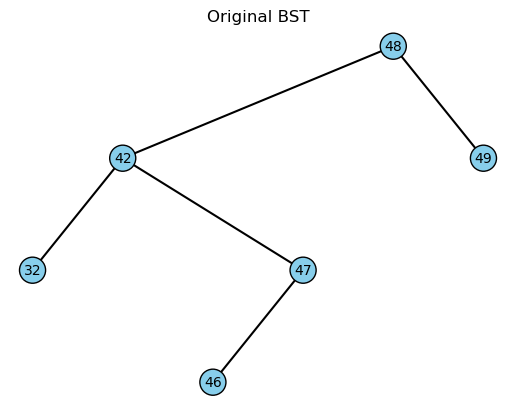

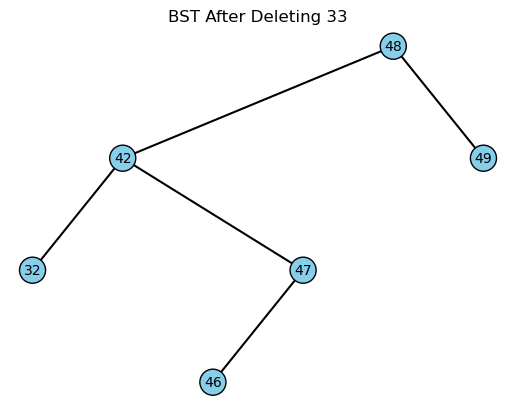

In [9]:
import matplotlib.pyplot as plt

class Node:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None
def insert(node, val):
    if not node:
        return Node(val)
    if val < node.val:
        node.left = insert(node.left, val)
    else:
        node.right = insert(node.right, val)
    return node
def delete(node, key):
    if not node:
        return None
    if key < node.val:
        node.left = delete(node.left, key)
    elif key > node.val:
        node.right = delete(node.right, key)
    else:
        if not node.left:
            return node.right
        if not node.right:
            return node.left
        temp = node.right
        while temp.left:
            temp = temp.left
        node.val = temp.val
        node.right = delete(node.right, temp.val)
    return node
def plot_bst(root, title):
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.axis('off')
    pos = {}
    def assign_pos(node, depth=0, x=0):
        if not node:
            return x
        x = assign_pos(node.left, depth + 1, x)
        pos[node] = (x, -depth)
        x += 1
        x = assign_pos(node.right, depth + 1, x)
        return x
    def draw_edges(node):
        if node.left:
            ax.plot([pos[node][0], pos[node.left][0]],
                    [pos[node][1], pos[node.left][1]], 'k-')
            draw_edges(node.left)
        if node.right:
            ax.plot([pos[node][0], pos[node.right][0]],
                    [pos[node][1], pos[node.right][1]], 'k-')
            draw_edges(node.right)
    def draw_nodes():
        for node, (x, y) in pos.items():
            ax.text(x, y, str(node.val), ha='center', va='center',
                    bbox=dict(boxstyle='circle', facecolor='skyblue', edgecolor='black'))
    assign_pos(root)
    draw_edges(root)
    draw_nodes()
    plt.show()
data = [48, 33, 49, 47, 42, 46, 32]
root1 = None
for v in data:
    root1 = insert(root1, v)
root2 = delete(root1, 33)
plot_bst(root1, "Original BST")
plot_bst(root2, "BST After Deleting 33")


## 问题 3 

> 下面是九门课程的开始和结束时间:
>
> [(9:00,12:30), (11:00,14:00), (13:00, 14:30), (9:00,10:30),(13:00, 14:30),(14:00,16:30), (15:00,16:30), (15:00,16:30), (9:00,10:30)]
>
> 请使用贪婪算法为这九门课分配教室，要求在同一天内安排这些课，并且每个教室同一时间只能安排一门课。

**请问最少需要几间教室，罗列出每个教室安排的课程**

idea：课程按开始时间排好序，用最早空闲的教室安排新课，若无教室空闲则新开一个教室



In [8]:
import heapq
from collections import defaultdict
def conv(t):
    h, m = map(int, t.split(":"))
    return h * 60 + m
a = [
    ("9:00", "12:30"), ("11:00", "14:00"), ("13:00", "14:30"),
    ("9:00", "10:30"), ("13:00", "14:30"), ("14:00", "16:30"),
    ("15:00", "16:30"), ("15:00", "16:30"), ("9:00", "10:30")
]
b = [(conv(x), conv(y), i) for i, (x, y) in enumerate(a)]
b.sort()
q = []
r = 0
res = defaultdict(list)
for st, ed, idx in b:
    ok = 0
    for i in range(len(q)):
        tend, rid = q[i]
        if tend <= st:
            q[i] = (ed, rid)
            heapq.heapify(q)
            res[rid].append(a[idx])
            ok = 1
            break
    if not ok:
        heapq.heappush(q, (ed, r))
        res[r].append(a[idx])
        r += 1
print("最少教室数：", r)
for k in sorted(res):
    print("教室", k, "安排：", res[k])


最少教室数： 3
教室 0 安排： [('9:00', '10:30'), ('11:00', '14:00'), ('14:00', '16:30')]
教室 1 安排： [('9:00', '10:30'), ('13:00', '14:30'), ('15:00', '16:30')]
教室 2 安排： [('9:00', '12:30'), ('13:00', '14:30'), ('15:00', '16:30')]


## 问题 4 

> 爬楼梯问题：假设爬楼梯时你每次只能爬一阶或者爬两阶，问爬上n阶的楼梯，你一共有多少种方法

请设计算法完成该问题，分析算法设计思路，计算时间复杂度，并基于python编程实现

idea：通过动态规划迭代，用两个变量记录相邻两阶的方法数，循环更新计算出爬 n 阶楼梯的总方法数

In [11]:
# add your code here
# your algorithm time complexity is: 
n = int(input("请输入楼梯的阶数: ")) 
if n == 0:  
    print(1)  
elif n == 1:  
    print(1)  
else:  
    a, b = 1, 1  
    for _ in range(2, n + 1):  
        a, b = b, a + b 
    print(b)
# 时间复杂度O(n)

请输入楼梯的阶数:  10


89


## 问题 5 

> 0-1背包问题：现在有4块大理石，每个大理石对应的重量和价值使用一个元组表示, 即（重量，价值），4块大理石的重量和价值为：[(5,10), (4,40), (6,30), (3, 50)], 假设你有一辆最大承重为9的小推车，请问使用这个小推车装大理石的最大价值为多少

请设计一个算法解决该问题，分析算法设计思路，计算时间复杂度，并基于python编程实现

idea：定义 dp[i][j] 表示前 i 块大理石、背包容量为 j 时能达到的最大价值，转移时判断选或不选第 i 块石头，逐步推满整个表。

In [14]:
# add your code here
# your algorithm time complexity is:
w = [5, 4, 6, 3]
v = [10, 40, 30, 50]
cap = 9
n = len(w)
d = [[0]*(cap+1) for _ in range(n+1)]

for i in range(1, n+1):
    for j in range(cap+1):
        d[i][j] = d[i-1][j]
        if j >= w[i-1]:
            d[i][j] = max(d[i][j], d[i-1][j-w[i-1]] + v[i-1])
print("最大价值：", d[n][cap])
# 时间复杂度O（N2)

最大价值： 90


## 问题 6 
给定 `n` 个非负整数表示每个宽度为 `1` 的柱子的高度图，计算按此排列的柱子，下雨之后能接多少雨水。



<div style="text-align:center;width:800px;"> <img alt="" src="./fig/hw3q6.png"> </div>

请分析算法设计思路，计算时间复杂度，并基于python编程实现

idea：每个柱子能接的水量是：它左边最高柱子和右边最高柱子中较小的那个，减去它自身高度。




In [15]:
# add your code here
# your algorithm time complexity is:
h = list(map(int, input("输入柱子高度：").split(',')))
n = len(h)
lmax = [0]*n
rmax = [0]*n
lmax[0] = h[0]
for i in range(1,n):
    lmax[i] = max(lmax[i-1], h[i])
rmax[-1] = h[-1]
for i in range(n-2, -1, -1):
    rmax[i] = max(rmax[i+1], h[i])
s = 0
for i in range(n):
    s += max(0, min(lmax[i], rmax[i]) - h[i])
print("总共接到雨水：", s)


输入柱子高度： 0,1,0,2,1,0,1,3,2,1,2,1


总共接到雨水： 6


## 问题 7 

**股票投资组合优化**： 假设你是一位投资者，想要在不同的股票中分配你的资金，以最大化你的投资回报。每只股票都有不同的预期收益率和风险。你的目标是选择一些股票，使得总投资金额不超过你的预算，并且预期收益最大化。

在这个情况下，你可以将每只股票视为一个“物品”，其重量为投资金额，价值为预期收益率。然后，你可以使用分级背包问题的方法来选择部分股票，以便在预算内获得最大的预期收益。

以下是一个简化的例子：

假设你有以下三只股票可供选择：

1. 股票 A：投资金额 5000 美元，预期收益率 10%
2. 股票 B：投资金额 3000 美元，预期收益率 8%
3. 股票 C：投资金额 2000 美元，预期收益率 12%

请设计算法找到最优投资方案，分析算法设计思路，计算时间复杂度，并基于python编程实现

idea：把每支股票当成一个物品，投资金额是“重量”，预期收益是“价值”，用 0-1 背包算法求最大收益

In [20]:
# add your code here
# your algorithm time complexity is:
# 输入预算
money = int(input("输入预算金额："))
n = int(input("股票个数："))
cost, gain = [], []
for _ in range(n):
    x, y = input("输入金额和收益率(%)：").split()
    cost.append(int(x))
    gain.append(int(x) * float(y)/100)  

dp = [0]*(money+1)

for i in range(n):
    for j in range(money, cost[i]-1, -1):
        dp[j] = max(dp[j], dp[j-cost[i]] + gain[i])

print("最大预期收益：", round(dp[money], 2))



输入预算金额： 10000
股票个数： 3
输入金额和收益率(%)： 5000 10
输入金额和收益率(%)： 3000 8
输入金额和收益率(%)： 2000 12


最大预期收益： 980.0


## 问题 8

给你二叉搜索树的根节点 root ，该树中的恰好两个节点的值被错误地交换。请在不改变其结构的情况下，恢复这棵树 。设计算法解决该问题，分析算法设计思路，计算时间复杂度，并基于python编程实现

e.g.:
---
1.

<div style="text-align:center;width:200px;"> <img alt="" src="./fig/hw3q9-1.jpg"> </div>
输入：root = [1,3,null,null,2]， 输出为：[3,1,null,null,2]， 

解释：3 不能是 1 的左孩子，因为 3 > 1 。交换 1 和 3 使二叉搜索树有效。

2.

 <div style="text-align:center;width:200px;"> <img alt="" src="./fig/hw3q9-1.jpg"> </div>
输入： root=[3,1,4,null,null,2]， 输出为：[2,1,4,null,null,3]

解释：2 不能在 3 的右子树中，因为 2 < 3 。交换 2 和 3 使二叉搜索树有效。

idea：借助AI  中序遍历 BST 正常应该是升序，找到中序遍历中两个顺序错误的节点，交换它们的值即可


In [23]:
# add your code here
# your algorithm time complexity is:
class Node:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None

# 中序打印树
def show(t):
    if not t: return
    show(t.left)
    print(t.val, end=' ')
    show(t.right)

# 修复错误的 BST
def fix(t):
    nonlocal_vars = {'a': None, 'b': None, 'pre': None}

    def go(n):
        if not n: return
        go(n.left)
        if nonlocal_vars['pre'] and nonlocal_vars['pre'].val > n.val:
            if not nonlocal_vars['a']:
                nonlocal_vars['a'] = nonlocal_vars['pre']
            nonlocal_vars['b'] = n
        nonlocal_vars['pre'] = n
        go(n.right)

    go(t)
    if nonlocal_vars['a'] and nonlocal_vars['b']:
        nonlocal_vars['a'].val, nonlocal_vars['b'].val = nonlocal_vars['b'].val, nonlocal_vars['a'].val
root = Node(1)
root.left = Node(3)
root.left.right = Node(2)
print("修复前中序：")
show(root)
fix(root)
print("\n修复后中序：")
show(root)

# 算法复杂度O（n）

修复前中序：
3 2 1 
修复后中序：
1 2 3 

## 问题 9  

给你一个二叉树的根节点 root ，树中每个节点都存放有一个 0 到 9 之间的数字。每条从根节点到叶节点的路径都代表一个数字：

> 例如，从根节点到叶节点的路径 1 -> 2 -> 3 表示数字 123 。

设计一个算法计算从根节点到叶节点生成的所有数字之和 ，分析算法设计思路，计算时间复杂度，并基于python编程实现

叶节点:是指没有子节点的节点。

e.g.:
---
1.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q10-1.jpg"> </div>

 输入：root = [1,2,3], 输出：25

解释：从根到叶子节点路径 1->2 代表数字 12，1->3 代表数字 13，因此和为 12 + 13 = 25 。

2.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q10-2.jpg"> </div>

 输入：root = [4,9,0,5,1], 输出：1026

解释：从根到叶子节点路径 4->9->5 代表数字 495，4->9->1 代表数字 491，4->0 代表数字 40。因此和为 495 + 491 + 40 = 1026 。

idea：从根开始递归，每到下一层就扩大当前值 ×10 加上节点值，直到叶子节点就加入总和

In [27]:
# add your code here
# your algorithm time complexity is:
class Node:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None
def make(arr):
    if not arr: return None
    r = Node(arr[0])
    q = [r]
    i = 1
    while i < len(arr):
        cur = q.pop(0)
        if i < len(arr) and arr[i] is not None:
            cur.left = Node(arr[i])
            q.append(cur.left)
        i += 1
        if i < len(arr) and arr[i] is not None:
            cur.right = Node(arr[i])
            q.append(cur.right)
        i += 1
    return r
def getsum(root):
    def go(t, now):
        if not t: return 0
        now = now * 10 + t.val
        if not t.left and not t.right:
            return now
        return go(t.left, now) + go(t.right, now)
    return go(root, 0)
tree1 = make([1,2,3])
print("输出：", getsum(tree1))  # 12 + 13 = 25
tree2 = make([4,9,0,5,1])
print("输出：", getsum(tree2))  # 495 + 491 + 40 = 1026
# 算法复杂度O(n)

输出： 25
输出： 1026


## 问题 10  

给你一个二叉树的根节点 root ， 检查它是否轴对称。

1. 分析算法设计思路，计算时间复杂度，并基于python编程实现
2. \* 设计使用递归和迭代两种方法解决这个问题，计算时间复杂度，并基于python编程实现

e.g.:
---
1.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q11-1.png"> </div>

 输入：root = [1,2,2,3,4,4,3]， 输出：true

解释：二叉树 [1,2,2,3,4,4,3] 对称。

2.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q11-2.png"> </div>

 输入：root = [1,2,2,null,3,null,3]， 输出：false

idea  判断左子树与右子树是否对称：即左子树的左与右子树的右相等，左的右与右的左相等，递归判断  借助AI


In [30]:
# add your code here
# your algorithm time complexity is:
class Node:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None

# 构造树（用层序数组构造）
def build(arr):
    if not arr: return None
    root = Node(arr[0])
    q = [root]
    i = 1
    while i < len(arr):
        cur = q.pop(0)
        if i < len(arr) and arr[i] != None:
            cur.left = Node(arr[i])
            q.append(cur.left)
        i += 1
        if i < len(arr) and arr[i] != None:
            cur.right = Node(arr[i])
            q.append(cur.right)
        i += 1
    return root


def isSym(t):
    def same(l, r):
        if not l and not r: return True
        if not l or not r: return False
        return l.val==r.val and same(l.left, r.right) and same(l.right, r.left)
    if not t: return True
    return same(t.left, t.right)


def isSym_iter(t):
    if not t: return True
    q = [(t.left, t.right)]
    while q:
        a, b = q.pop(0)
        if not a and not b: continue
        if not a or not b or a.val != b.val: return False
        q.append((a.left, b.right))
        q.append((a.right, b.left))
    return True


tree1 = build([1,2,2,3,4,4,3])
print("递归：", isSym(tree1))   # True
print("迭代：", isSym_iter(tree1))  # True


tree2 = build([1,2,2,None,3,None,3])
print("递归：", isSym(tree2))   # False
print("迭代：", isSym_iter(tree2))  # False
# 算法复杂度O(n)

递归： True
迭代： True
递归： False
迭代： False


## 问题 11  

给你一个由 '1'（陆地）和 '0'（水）组成的的二维网格，请你计算网格中岛屿的数量。岛屿总是被水包围，并且每座岛屿只能由水平方向和/或竖直方向上相邻的陆地连接形成。

此外，你可以假设该网格的四条边均被水包围。

分析算法设计思路，计算时间复杂度，并基于python编程实现

e.g.:
---
1.
输入：grid = [

    ["1","1","1","1","0"],

    ["1","1","0","1","0"], 

    ["1","1","0","0","0"], 

    ["0","0","0","0","0"]  

]

输出：1

2.
输入：grid = [

    ["1","1","0","0","0"],

    ["1","1","0","0","0"],

    ["0","0","1","0","0"],

    ["0","0","0","1","1"]

]

输出：3

idea:遍历网格，遇到 '1' 就深度优先搜索标记整块岛屿，同时计数

In [35]:
# add your code here
# your algorithm time complexity is:
def findIsland(g):
    if not g: return 0
    n, m = len(g), len(g[0])
    
    def go(x, y):
        if x<0 or x>=n or y<0 or y>=m or g[x][y] != '1':
            return
        g[x][y] = '#'  
        go(x+1, y)
        go(x-1, y)
        go(x, y+1)
        go(x, y-1)

    res = 0
    for i in range(n):
        for j in range(m):
            if g[i][j] == '1':
                res += 1
                go(i, j)
    return res
grid1 = [
    ["1","1","1","1","0"],
    ["1","1","0","1","0"],
    ["1","1","0","0","0"],
    ["0","0","0","0","0"]
]

grid2 = [
    ["1","1","0","0","0"],
    ["1","1","0","0","0"],
    ["0","0","1","0","0"],
    ["0","0","0","1","1"]
]
print("示例1输出：", findIsland([row[:] for row in grid1]))  
print("示例2输出：", findIsland([row[:] for row in grid2]))  
# 算法复杂度O(nm)

示例1输出： 1
示例2输出： 3
